In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_context('poster')
sns.set(font_scale=1)

In [3]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
# Read the three CSV files
df_foodgrain = pd.read_csv('./data/Production_of_Agriculture_Stock-Ministry_of_Finance.csv')

In [5]:
df_foodgrain.head()

,Particulars,Frequency,Unit,9-2013,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
0,Foodgrains,Monthly,Ton mn,59.24,62.68,59.69,58.37,55.91,52.48,48.39,63.06,69.85,65.34
1,Rice,Monthly,Ton mn,19.03,16.85,14.22,14.70,16.94,18.88,20.28,20.42,20.65,21.24
2,Unmilled Paddy in term of Rice,Monthly,Ton mn,4.11,11.73,14.41,15.62,14.77,12.76,10.28,8.24,7.61,4.30
3,Wheat,Monthly,Ton mn,36.10,34.10,31.07,28.05,24.20,20.84,17.83,34.40,41.59,39.80


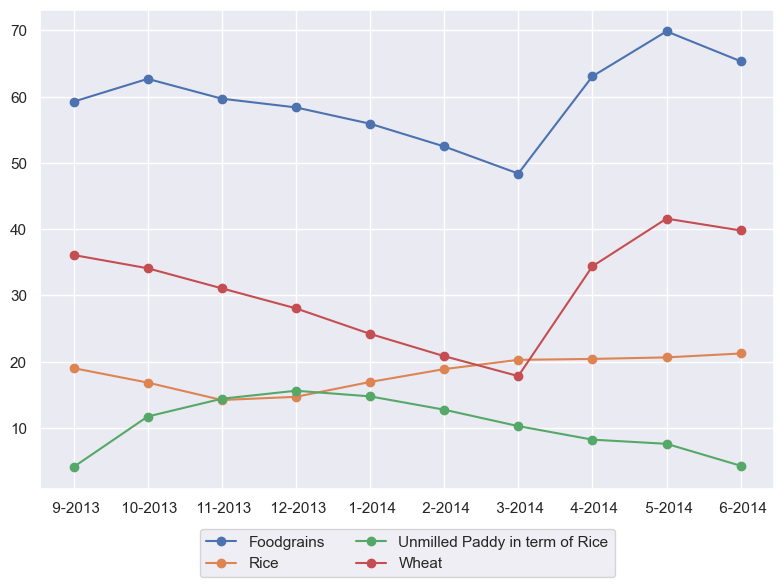

In [6]:
fig = plt.figure(figsize=(8, 6))

for i in range(len(df_foodgrain)):
    plt.plot(df_foodgrain.iloc[i][3:], label=f"{df_foodgrain.iloc[i][0]}", marker='o')

plt.legend(ncol = 2, bbox_to_anchor=(0.5, -0.2), loc='lower center')
fig.tight_layout()
plt.show()

In [7]:
diff_fg = df_foodgrain.iloc[:, 3:].diff(axis=1)
diff_fg = pd.concat((df_foodgrain.iloc[:, :3], diff_fg.iloc[:, 1:]), axis=1)
diff_fg

,Particulars,Frequency,Unit,10-2013,11-2013,12-2013,1-2014,2-2014,3-2014,4-2014,5-2014,6-2014
0,Foodgrains,Monthly,Ton mn,3.44,-2.99,-1.32,-2.46,-3.43,-4.09,14.67,6.79,-4.51
1,Rice,Monthly,Ton mn,-2.18,-2.63,0.48,2.24,1.94,1.40,0.14,0.23,0.59
2,Unmilled Paddy in term of Rice,Monthly,Ton mn,7.62,2.68,1.21,-0.85,-2.01,-2.48,-2.04,-0.63,-3.31
3,Wheat,Monthly,Ton mn,-2.00,-3.03,-3.02,-3.85,-3.36,-3.01,16.57,7.19,-1.79


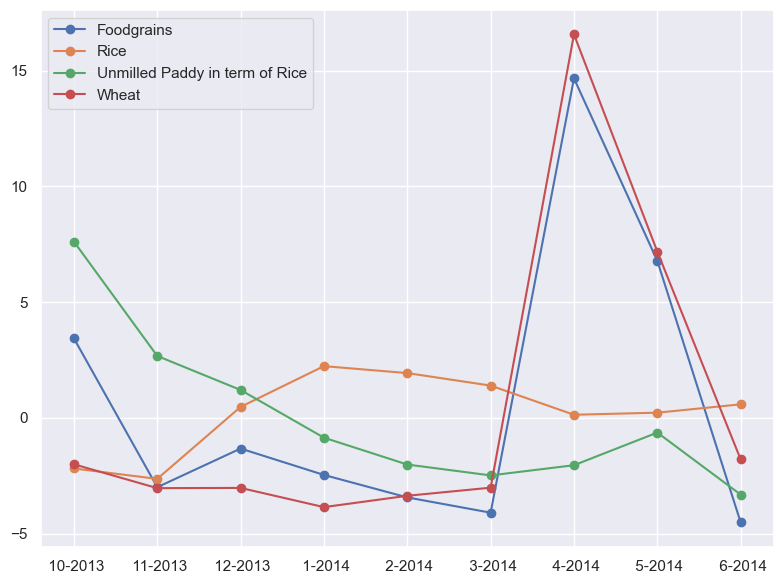

In [8]:
fig = plt.figure(figsize=(8, 6))

for i in range(len(diff_fg)):
    plt.plot(diff_fg.iloc[i][3:], label=f"{diff_fg.iloc[i][0]}", marker='o')

# plt.legend(ncol = 2, bbox_to_anchor=(0.5, -0.2), loc='lower center')
plt.legend()
fig.tight_layout()

plt.show()


## Continuous Color Palette

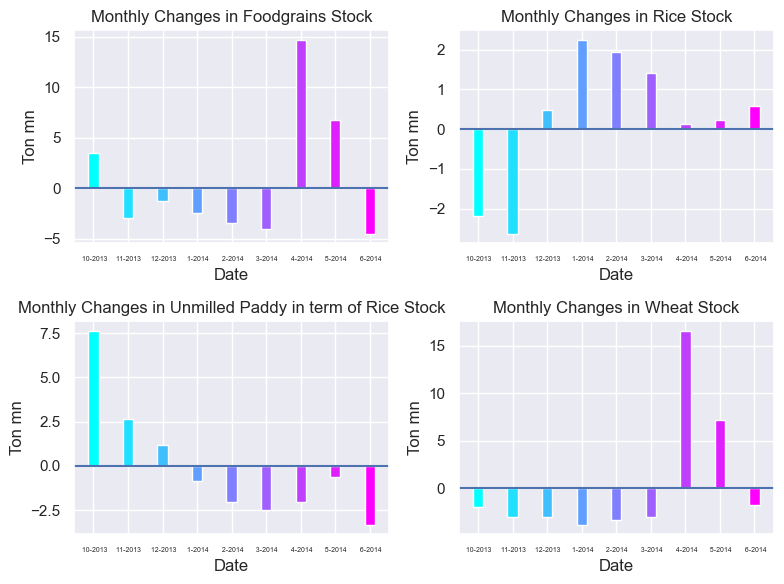

In [9]:
import matplotlib.cm as cm
colors = cm.cool(np.linspace(0, 1, 9))
colors

fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=colors)
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()


## 1 Color Sequential Color Palette

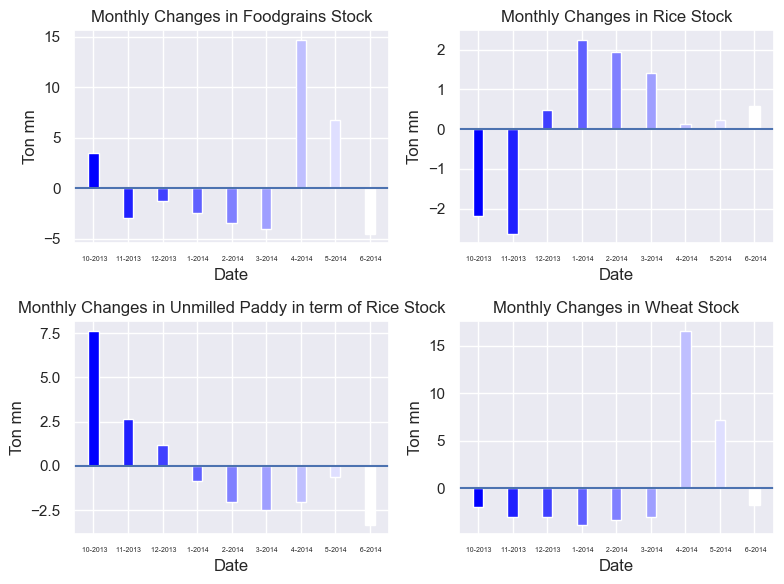

In [10]:
import matplotlib.colors as colors
import matplotlib.colors as mcolors

base_color = 'blue'
def lighten_color(color, amount=0.5):
    """
    Lightens the given color by blending it with white
    """
    color = mcolors.to_rgb(color)
    white = (1.0, 1.0, 1.0)
    red = color[0] + (white[0] - color[0]) * amount
    green = color[1] + (white[1] - color[1]) * amount
    blue = color[2] + (white[2] - color[2]) * amount
    return (red, green, blue)

palette = colors.ListedColormap(
    [lighten_color(base_color, i) for i in np.linspace(0, 1, 9)]
)


fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=palette(range(len(diff_fg.iloc[index][3:]))))
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()



# Bipolar Sequential Scale
Blue -> Gray -> Red

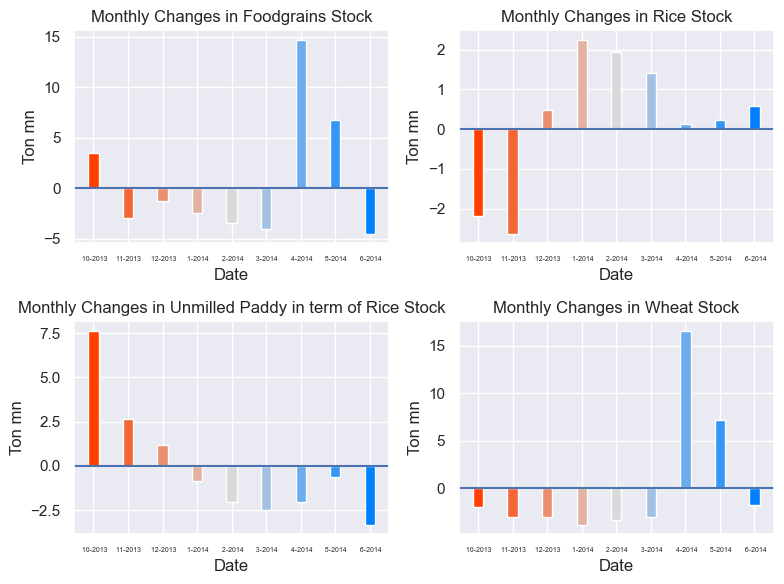

In [11]:
color_start = '#ff4000'   # blue
color_end = '#0080ff'     # red
color_neutral = '#d9d9d9' # gray

# Create a list of colors that transitions from blue to red through the neutral gray color
colors_list = [colors.LinearSegmentedColormap.from_list("", [color_start, color_neutral, color_end])(x) for x in np.linspace(0, 1, 9)]

# Use the ListedColormap function to create a bipolar sequential palette
palette = colors.ListedColormap(colors_list, name='bipolar')
# loop over rows and columns of the grid
fig, axs = plt.subplots(2, 2, figsize=(8, 6))
for i in range(2):
    for j in range(2):
        # plot the bar chart in the current subplot
        index = i*2 + j
        ax = axs[i, j]
        ax.bar(diff_fg.columns[3:], diff_fg.iloc[index][3:], width=0.3, bottom=0, color=palette(range(len(diff_fg.iloc[index][3:]))))
        ax.axhline(y=0)
        ax.set_xticklabels(diff_fg.columns[3:], fontsize=5)
        ax.set_xlabel('Date')
        ax.set_ylabel('Ton mn')
        ax.set_title(f'Monthly Changes in {diff_fg.iloc[index][0]} Stock')

# adjust spacing between subplots
plt.tight_layout()

# show the plot
plt.show()
